# Jadon Sancho - Passing stats

## Summary of results

### Pass Completion

**Total passes:** 271<br>
**Passes from the left:** 145<br>
**Passes from the center:** 40<br>
**Passes from the right:** 86
<br><br>
**Successful passes:** 223<br>
**Successful passes from the left:** 121<br>
**Successful passes from the center:** 32<br>
**Successful passes from the right:** 70
<br><br>
**Pass completion rate:** 82.3%<br>
**Pass completion left:** 83.4%<br>
**Pass completion center:** 80.0%<br>
**Pass completion right:** 81.4%<
<br><br>
Pass completion seems to be unaffected by the starting position of the pass.
<br><br>

### Progressive Pass Completion
**Progressive Passes Attempted:** 36<br>
**Progressive Passes Attempted from the left:** 19<br>
**Progressive Passes Attempted from the center:** 7<br>
**Progressive Passes Attempted from the right:** 10
<br><br>

**Successful progressive passes:** 22<br>
**Successful progressive passes from the left:** 14<br>
**Successful progressive passes from the center:** 4<br>
**Successful progressive passes from the right:** 4
<br><br>

**Progressive pass completion rate:** 61.111111111111114<br>
**Progressive pass completion left:** 73.68421052631578<br>
**Progressive pass completion center:** 57.14285714285714<br>
**Progressive pass completion right:** 40.0
<br><br>
Jadon Sancho appears to have a lot more success at progressive passes from the left compared to the right. 

### Progressive Passes per Pass Attempt
**Successful progressive passes per pass attempt:** 8.12%<br>
**Successful progressive passes per pass attempt (left):** 9.655%<br>
**Successful progressive passes per pass attempt (center):** 10.0%<br>
**Successful progressive passes per pass attempt (right):** 4.65%
<br><br>
Jadon Sancho makes more than twice as many progressive pass per touch from the left than from the right. The difference between left and center are miniscule.
<br><br>

In [83]:
from mplsoccer.pitch import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [84]:
#Read in the data
DF = pd.read_csv('sancho_actions_merged.csv')
del DF['Competition']
del DF['Opposition']
del DF['isTop6']
del DF['isGoal']
DF

,Event ID,Player,Minute,Second,X,Y,Type,Outcome,endX,endY,isAssist,Set Piece,Left,Center,Right
0,134,346300,6,57.0,64.6,6.6,TakeOn,Pos,-1.0,-1.0,Blank,Blank,Blank,Blank,Yes
1,135,346300,6,58.0,73.0,13.2,Pass,Pos,67.1,31.9,Blank,Blank,Blank,Blank,Yes
2,138,346300,7,8.0,72.8,52.2,SavedShot,Pos,-1.0,-1.0,Blank,Blank,Blank,Yes,Blank
3,147,346300,7,24.0,98.5,23.9,Pass,Neg,97.7,27.4,Blank,Blank,Blank,Blank,Yes
4,155,346300,7,37.0,71.3,16.4,BallRecovery,Pos,-1.0,-1.0,Blank,Blank,Blank,Blank,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1524,346300,81,50.0,29.7,84.2,Pass,Pos,34.1,69.1,Blank,Blank,Yes,Blank,Blank
376,1589,346300,87,6.0,64.8,98.4,Fouled,Pos,-1.0,-1.0,Blank,Blank,Yes,Blank,Blank
377,1592,346300,88,NaN,81.8,96.9,OffsideGiven,Neg,-1.0,-1.0,Blank,Blank,Yes,Blank,Blank
378,1616,346300,89,40.0,77.3,56.3,Pass,Pos,87.6,24.9,Blank,Blank,Blank,Yes,Blank


In [85]:
#Filtering out actions that are not passes
passes = DF[DF['Type']=='Pass']
passes

,Event ID,Player,Minute,Second,X,Y,Type,Outcome,endX,endY,isAssist,Set Piece,Left,Center,Right
1,135,346300,6,58.0,73.0,13.2,Pass,Pos,67.1,31.9,Blank,Blank,Blank,Blank,Yes
3,147,346300,7,24.0,98.5,23.9,Pass,Neg,97.7,27.4,Blank,Blank,Blank,Blank,Yes
5,156,346300,7,37.0,71.3,16.4,Pass,Pos,65.1,15.2,Blank,Blank,Blank,Blank,Yes
6,189,346300,9,20.0,65.8,37.0,Pass,Pos,70.5,7.6,Blank,Blank,Blank,Yes,Blank
7,203,346300,10,7.0,88.2,6.8,Pass,Pos,97.3,24.3,Blank,Blank,Blank,Blank,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,1429,346300,76,16.0,63.1,92.6,Pass,Pos,55.4,96.3,Blank,Blank,Yes,Blank,Blank
373,1499,346300,79,46.0,36.6,95.1,Pass,Pos,20.5,94.4,Blank,Blank,Yes,Blank,Blank
374,1507,346300,80,48.0,75.4,93.5,Pass,Neg,89.4,48.1,Blank,Blank,Yes,Blank,Blank
375,1524,346300,81,50.0,29.7,84.2,Pass,Pos,34.1,69.1,Blank,Blank,Yes,Blank,Blank


In [86]:
#pass completion stats

Total_passes = passes.X.count()

passes_from_left = passes.Left.value_counts()['Yes']
passes_from_center = passes.Center.value_counts()['Yes']
passes_from_right = passes.Right.value_counts()['Yes']

successful_passes = passes.Outcome.value_counts()['Pos']

#x = (test['Sex'].eq('female') & test['Pclass'].eq(3)).sum()

sP_left = (passes['Outcome'].eq('Pos') & passes['Left'].eq('Yes')).sum()
sP_center = (passes['Outcome'].eq('Pos') & passes['Center'].eq('Yes')).sum()
sP_right = (passes['Outcome'].eq('Pos') & passes['Right'].eq('Yes')).sum()

print('Pass completion rate:', (successful_passes/Total_passes)*100)
print('\n')
print('Total passes', Total_passes)
print('Passes from the left:', passes_from_left)
print('Passes from the center:', passes_from_center)
print('Passes from the right:', passes_from_right)
print('\n')
print('Successful passes:', successful_passes)
print('Successful passes from the left:', sP_left)
print('Successful passes from the center:', sP_center)
print('Successful passes from the right:', sP_right)
print('\n')
print('Pass completion left:', (sP_left/passes_from_left)*100)
print('Pass completion center:', (sP_center/passes_from_center)*100)
print('Pass completion right:', (sP_right/passes_from_right)*100)

Pass completion rate: 82.28782287822878


Total passes 271
Passes from the left: 145
Passes from the center: 40
Passes from the right: 86


Successful passes: 223
Successful passes from the left: 121
Successful passes from the center: 32
Successful passes from the right: 70


Pass completion left: 83.44827586206897
Pass completion center: 80.0
Pass completion right: 81.3953488372093


Text(0.5, 1.0, 'Sancho passes in the CL last season')

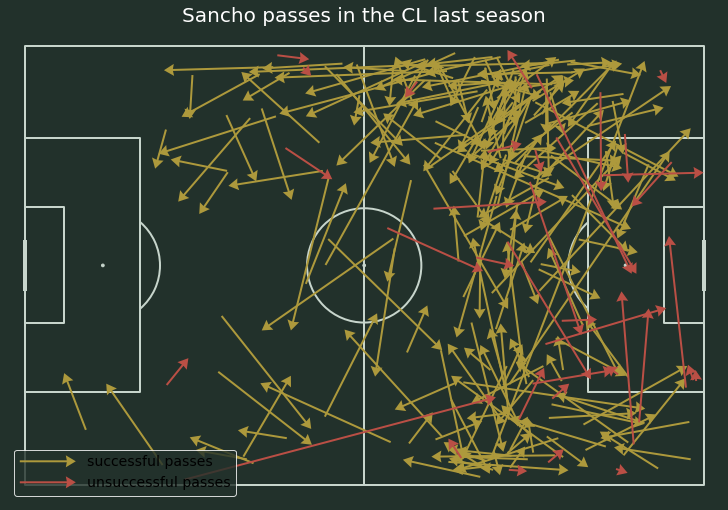

In [87]:
#Code to plot Sancho's passmap

pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

mask_incomplete = []
mask_prog = []
mask_complete = []
mask_prog_failed = []


for i in range(len(passes['X'])):
    if passes['Outcome'].iloc[i]=='Pos' and passes['Set Piece'].iloc[i]=='Blank':
        mask_complete.append(True)
    else:
        mask_complete.append(False)
        
    if passes['Outcome'].iloc[i]=='Neg' and passes['Set Piece'].iloc[i]=='Blank':
        mask_incomplete.append(True)
    else:
        mask_incomplete.append(False)
            
            
# Plot the completed passes            
pitch.arrows(passes[mask_complete].X, passes[mask_complete].Y,
             passes[mask_complete].endX, passes[mask_complete].endY, width=2,
             headwidth=6, headlength=5, color='#ad993c', ax=ax, label='successful passes')

# Plot unsuccessful passes
pitch.arrows(passes[mask_incomplete].X, passes[mask_incomplete].Y,
             passes[mask_incomplete].endX, passes[mask_incomplete].endY, width=2,
             headwidth=6, headlength=5, color='#ba4f45', ax=ax, label='unsuccessful passes')

# setup the legend
ax.legend(facecolor='#22312b', handlelength=4, edgecolor='White', fontsize=14, loc='lower left')

# Set the title
ax.set_title('Sancho passes in the CL last season', fontsize=20, color='White')

In [88]:
#Code here adds a coulmn for progressive passes

'''
A pass is considered a progressive pass:

1) if the starting position of the pass in in the opposition half
In this case, if the pass move the ball closer to goal by 25% it is considered a progressive passs

2) if the starting position is in player's half:
In this case, the player needs to move the ball closer to the goal by 40% for it to be considered a progressive pass

Note: Any pass from a set piece is automatically deemed as not a progressive pass

'''

#Used the variable goal to assign coordinates to the location of opposition goal
goal = (100, 50)

progressive = []
diff = []
  
for i in range(len(passes['Type'])):
    start_x = passes['X'].iloc[i]
    start_y = passes['Y'].iloc[i]
    
    start_x_diff = goal[0] - start_x
    start_y_diff = goal[1] - start_y
    start_diff = math.hypot(start_x_diff, start_y_diff)
    
    end_x = passes['endX'].iloc[i]
    end_y = passes['endY'].iloc[i]
    
    end_x_diff = goal[0] - end_x
    end_y_diff = goal[1] - end_y
    end_diff = math.hypot(end_x_diff, end_y_diff)
    
    per_diff = ((start_diff-end_diff)/start_diff)*100
    
    diff.append(per_diff)
    
    #Code to assign the value 'no' to set pieces
    if passes['Set Piece'].iloc[i]!='Blank':
        progressive.append('No')
    
    #code to determine whether a pass initiated in the opposition half is profressive or not
    elif start_x > 50:
        if end_diff <= (0.75 * start_diff):
            if passes['Outcome'].iloc[i]=='Pos':
                progressive.append('Yes')
            elif passes['Outcome'].iloc[i]=='Neg':
                progressive.append('Failed')
                
        else:
            progressive.append('No')
    
    #code to determine whether a pass initiated in the player's half is profressive or not            
    else:
        if end_diff <= (0.6 * start_diff):
            if passes['Outcome'].iloc[i]=='Pos':
                progressive.append('Yes')
            elif passes['Outcome'].iloc[i]=='Neg':
                progressive.append('Failed')
        else:
            progressive.append('No')        
                           
    
passes['Difference'] = diff
passes['isProgressive'] = progressive
passes.head(55)
#passes.tail(22)

<ipython-input-88-b271e372ca04>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['Difference'] = diff
<ipython-input-88-b271e372ca04>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['isProgressive'] = progressive


,Event ID,Player,Minute,Second,X,Y,Type,Outcome,endX,endY,isAssist,Set Piece,Left,Center,Right,Difference,isProgressive
1,135,346300,6,58.0,73.0,13.2,Pass,Pos,67.1,31.9,Blank,Blank,Blank,Blank,Yes,17.729718,No
3,147,346300,7,24.0,98.5,23.9,Pass,Neg,97.7,27.4,Blank,Blank,Blank,Blank,Yes,13.106090,No
5,156,346300,7,37.0,71.3,16.4,Pass,Pos,65.1,15.2,Blank,Blank,Blank,Blank,Yes,-11.533678,No
6,189,346300,9,20.0,65.8,37.0,Pass,Pos,70.5,7.6,Blank,Blank,Blank,Yes,Blank,-41.176310,No
7,203,346300,10,7.0,88.2,6.8,Pass,Pos,97.3,24.3,Blank,Blank,Blank,Blank,Yes,42.295785,Yes
8,208,346300,11,1.0,99.5,0.5,Pass,Pos,92.7,41.5,Blank,Corner,Blank,Blank,Yes,77.365875,No
10,213,346300,11,24.0,99.5,0.5,Pass,Neg,89.0,49.3,Blank,Corner,Blank,Blank,Yes,77.733964,No
12,323,346300,16,44.0,98.1,5.9,Pass,Pos,86.8,8.6,Blank,Blank,Blank,Blank,Yes,1.557483,No
15,400,346300,19,38.0,71.5,4.0,Pass,Pos,73.7,8.8,Blank,Blank,Blank,Blank,Yes,9.673368,No
16,403,346300,19,45.0,74.9,23.9,Pass,Pos,69.4,13.7,Blank,Blank,Blank,Blank,Yes,-31.112467,No


In [89]:
#(passes['Outcome'].eq('Pos') & passes['Left'].eq('Yes')).sum()
#passes.Left.value_counts()['Yes']

Prog_pass_attempted = passes.isProgressive.value_counts()['Yes'] + passes.isProgressive.value_counts()['Failed']
Succ_Prog_pass = passes.isProgressive.value_counts()['Yes']

Prog_pass_left = (passes['isProgressive'].eq('Yes') & passes['Left'].eq('Yes')).sum() + (passes['isProgressive'].eq('Failed') & passes['Left'].eq('Yes')).sum()
Prog_pass_center = (passes['isProgressive'].eq('Yes') & passes['Center'].eq('Yes')).sum() + (passes['isProgressive'].eq('Failed') & passes['Center'].eq('Yes')).sum()
Prog_pass_right = (passes['isProgressive'].eq('Yes') & passes['Right'].eq('Yes')).sum() + (passes['isProgressive'].eq('Failed') & passes['Right'].eq('Yes')).sum()

Succ_Prog_pass_left = (passes['isProgressive'].eq('Yes') & passes['Left'].eq('Yes')).sum()
Succ_Prog_pass_center = (passes['isProgressive'].eq('Yes') & passes['Center'].eq('Yes')).sum()
Succ_Prog_pass_right = (passes['isProgressive'].eq('Yes') & passes['Right'].eq('Yes')).sum()

print('Progressive Passes Attempted:', Prog_pass_attempted)
print ('Progressive Passes Attempted from the left:', Prog_pass_left)
print ('Progressive Passes Attempted from the center:', Prog_pass_center)
print ('Progressive Passes Attempted from the right:', Prog_pass_right)
print('\n')
print('Successful progressive passes:', Succ_Prog_pass)
print('Successful progressive passes from the left:', Succ_Prog_pass_left)
print('Successful progressive passes from the center:', Succ_Prog_pass_center)
print('Successful progressive passes from the right:', Succ_Prog_pass_right)
print('\n')
print('Progressive pass completion rate:', (Succ_Prog_pass/Prog_pass_attempted)*100)
print('Progressive pass completion left:', (Succ_Prog_pass_left/Prog_pass_left)*100)
print('Progressive pass completion center:', (Succ_Prog_pass_center/Prog_pass_center)*100)
print('Progressive pass completion right:', (Succ_Prog_pass_right/Prog_pass_right)*100)
      

Progressive Passes Attempted: 36
Progressive Passes Attempted from the left: 19
Progressive Passes Attempted from the center: 7
Progressive Passes Attempted from the right: 10


Successful progressive passes: 22
Successful progressive passes from the left: 14
Successful progressive passes from the center: 4
Successful progressive passes from the right: 4


Progressive pass completion rate: 61.111111111111114
Progressive pass completion left: 73.68421052631578
Progressive pass completion center: 57.14285714285714
Progressive pass completion right: 40.0


In [90]:
#Progressive passes per pass attempted

succ_prog_per_pass_attempted = (Succ_Prog_pass/Total_passes)*100
succ_prog_per_pass_attempted_left = (Succ_Prog_pass_left/passes_from_left)*100
succ_prog_per_pass_attempted_center = (Succ_Prog_pass_center/passes_from_center)*100
succ_prog_per_pass_attempted_right = (Succ_Prog_pass_right/passes_from_right)*100

print('Successful progressive passes per pass attempt:', succ_prog_per_pass_attempted)
print('Successful progressive passes per pass attempt (left):', succ_prog_per_pass_attempted_left)
print('Successful progressive passes per pass attempt (center):', succ_prog_per_pass_attempted_center)
print('Successful progressive passes per pass attempt (right):', succ_prog_per_pass_attempted_right)

Successful progressive passes per pass attempt: 8.118081180811808
Successful progressive passes per pass attempt (left): 9.655172413793103
Successful progressive passes per pass attempt (center): 10.0
Successful progressive passes per pass attempt (right): 4.651162790697675


Text(0.5, 1.0, 'Sancho progressive passes in the CL last season')

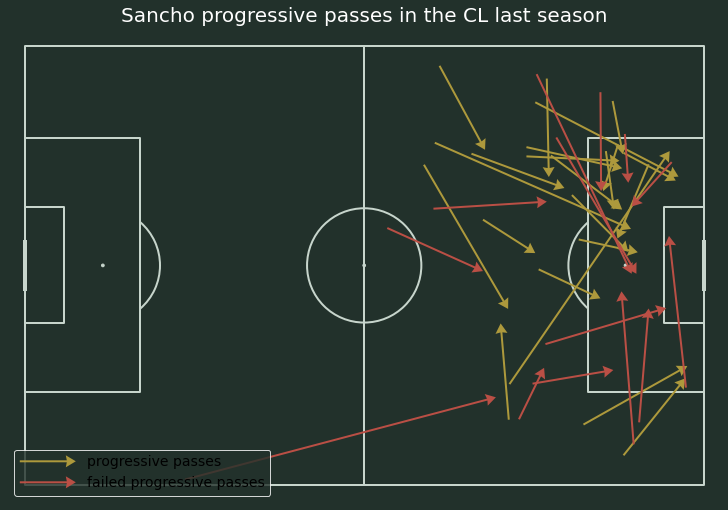

In [91]:
#Code to plot Sancho's progressive passes

pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

mask_incomplete = []
mask_prog = []
mask_complete = []
mask_prog_failed = []
#mask = mask_complete and mask_prog

for i in range(len(passes['X'])):
    if passes['isProgressive'].iloc[i]=='Yes':
        mask_prog.append(True)
    else:
        mask_prog.append(False)
        
    if passes['isProgressive'].iloc[i]=='Failed':
        mask_prog_failed.append(True)
    else:
        mask_prog_failed.append(False)
                     
# Plot the completed progressive passes 
pitch.arrows(passes[mask_prog].X, passes[mask_prog].Y,
             passes[mask_prog].endX, passes[mask_prog].endY, width=2,
             headwidth=6, headlength=5, color='#ad993c', ax=ax, label='progressive passes')

# Plot the failed progressive passes 
pitch.arrows(passes[mask_prog_failed].X, passes[mask_prog_failed].Y,
             passes[mask_prog_failed].endX, passes[mask_prog_failed].endY, width=2,
             headwidth=6, headlength=5, color='#ba4f45', ax=ax, label='failed progressive passes')
# setup the legend
ax.legend(facecolor='#22312b', handlelength=4, edgecolor='white', fontsize=14, loc='lower left')

# Set the title
ax.set_title('Sancho progressive passes in the CL last season', fontsize=20, color='White')